![portada](../Data/portada.jpg)

1. [Introducción](#1.-Introduccion)
2. [Hipótesis](#2.-Hipótesis)
3. [Metodología](#3.-Metodologia)
4. [Descripción de las variables](#4.-Descripcion-de-las-variables)
5. [Análisis](#5.-Analisis)
6. [Conclusiones](#6.-Conclusiones)
7. [Creación CSV](#7.-Creación_CSV)

## 1. Introduccion

En el actual mercado inmobiliario, el análisis de datos se ha convertido en una herramienta indispensable para la predicción de precios de viviendas. Los especialistas en datos inmobiliarios son profesionales altamente buscados, quienes mediante su experticia técnica y conocimientos específicos, extraen información crucial de conjuntos de datos relacionados con propiedades. Comprender cómo las distintas variables, como la ubicación, tamaño o año de construcción, influyen en el precio de las viviendas en Madrid puede ser esencial tanto para las agencias inmobiliarias como para los potenciales compradores.

En este Análisis Exploratorio de Datos (EDA), nos centraremos en el mercado de viviendas de Madrid, explorando cómo los precios de las propiedades varían en función de diferentes factores. Examinaremos las fluctuaciones de precios entre viviendas de nueva construcción frente a las antiguas, la influencia de las distintas zonas de la ciudad, y cómo características específicas, como la presencia de terrazas o piscinas, pueden afectar el valor de una propiedad.

A través de este EDA, aspiramos a identificar tendencias, correlaciones y patrones que ofrezcan una visión clara sobre la dinámica de precios en el sector inmobiliario madrileño. Estos descubrimientos pueden ser de gran utilidad para las agencias inmobiliarias, que pueden afinar sus estrategias de valoración y marketing, y para los compradores, que obtendrán una visión más informada sobre el valor real de una propiedad.

Mediante visualizaciones detalladas, análisis estadísticos y una profunda exploración de datos, buscamos arrojar luz sobre las variaciones de precios en el mercado de viviendas de Madrid en función de diversos criterios. Esta investigación no sólo será valiosa para entender el panorama actual, sino que también puede sentar las bases para futuros análisis y pronósticos en el dinámico mercado inmobiliario de Madrid.

## 2. Hipótesis

Buscamos encontrar la relación entre el precio de una vivienda y el tamaño, así como la zona donde se encuentra.

Valoramos también los servicios y amenities que tiene.

## 3. Metodologia

En este estudio, se realizará un análisis exploratorio de datos (EDA) para investigar los precios de las viviendas en el campo de data science. El objetivo es comprender las relaciones y patrones que existen entre los Precios y las variables seleccionadas: 'Superficie_m2', 'Baños', 'Latitud', 'Habitaciones', 'Piso', 'Ascensor', 
       'Aire_Acondicionado', 'Calefaccion', 'Parking', 'Balcon', 'Terraza',
       'Piscina', 'Precio_Medio_cp'.

Llevaremos a cabo un análisis descriptivo de las variables para comprender su distribución y características estadísticas relevantes. Buscaremos las relaciones entre las variables seleccionadas y los precios de las viviendas de madrid mediante técnicas de visualización y análisis estadístico para investigar posibles correlaciones o asociaciones. 

<!-- DATASET SACADO DE KAGGLE

https://www.kaggle.com/datasets/alefernandezarmas/madrid-real-state-prices -->

## 4. Descripcion de las variables.

1. **Address** -> Dirección de la vivienda

2. **Zipcode** -> Código Postal

3. **Latitude** -> Latitud

4. **Longitude** -> Longitud

5. **Price** -> Precio de la casa

6. **Date** -> Fecha de publicación del aviso de venta

7. **Rooms** -> Numero de habitaciones

8. **Bathrooms** -> Número de baños

9. **Surface** -> Superficie de la vivienda en metros cuadrados

10. **Floor** -> Numero de piso

11. **Elevator** -> Si tiene o no ascensor

12. **Air_Conditioner** -> Si tiene o no aire acondicionado

13. **Heater** -> Si tiene o no calfacción

14. **Parking** -> Si tiene o no parking

15. **Balcony** -> Si tiene o no balcón

16. **Terrace** -> Si tiene o no terraza

17. **Swimming_Pool** -> Si tiene o no piscina


## 5. Análisis.

In [1]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import folium
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import streamlit as st
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import pickle
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderInsufficientPrivileges
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

In [2]:
# Ampliar tamaño columnas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", None)

In [3]:
# Importamos el dataset como un dataframe
madrid = pd.read_csv("../Data/Raw/buy_houses_Madrid.csv",sep=';')

In [4]:
# Una primera mirada al df
madrid.head()

,Address,Zipcode,Latitude,Longitude,Price,Date,Rooms,Bathrooms,Surface,Floor,Elevator,Air_Conditioner,Heater,Parking,Balcony,Terrace,Swimming_Pool
0,Retiro,28007.0,40.402584,-3.672911,445000,2023-06-07,2,2,102,0,1,1,1,0,0,0,1
1,Calle de Pobladura del Valle San Blas,28037.0,40.423885,-3.621543,108000,2023-07-11,3,1,53,6,0,0,0,0,0,0,0
2,Calle de Pobladura del Valle San Blas,28037.0,40.423680,-3.621510,108000,2023-07-10,3,1,53,0,0,0,0,0,0,0,0
3,Calle Amparo Centro,28012.0,40.407387,-3.701162,235000,2023-04-16,2,1,68,0,0,1,1,0,0,0,0
4,Barrio de Salamanca,28001.0,40.420685,-3.688424,2350000,2022-09-09,2,2,177,7,1,1,0,0,1,0,0


In [5]:
# Vemos los principales datos descriptivos del df
madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Zipcode,14125.0,28015.597027,608.219478,3189.000000,28010.000000,28022.000000,28037.000000,4.559300e+04
Latitude,14130.0,40.411858,0.589910,0.000000,40.394597,40.417553,40.438630,4.053152e+01
Longitude,14130.0,-3.688015,0.067418,-3.836437,-3.709508,-3.696435,-3.668513,0.000000e+00
Price,14130.0,504714.592711,618397.390736,0.000000,185000.000000,306000.000000,585000.000000,1.950000e+07
Rooms,14130.0,2.591507,1.285937,0.000000,2.000000,2.000000,3.000000,3.300000e+01
Bathrooms,14130.0,1.734253,1.089690,0.000000,1.000000,1.000000,2.000000,1.200000e+01
Surface,14130.0,103.547346,81.282876,0.000000,61.000000,84.000000,120.000000,2.160000e+03
Floor,14130.0,5.294126,3.898326,0.000000,0.000000,6.000000,8.000000,3.100000e+01
Elevator,14130.0,0.661925,0.473071,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Air_Conditioner,14130.0,0.470134,0.499125,0.000000,0.000000,0.000000,1.000000,1.000000e+00


In [6]:
# Vemos la información de las variables
madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14130 entries, 0 to 14129
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          14130 non-null  object 
 1   Zipcode          14125 non-null  float64
 2   Latitude         14130 non-null  float64
 3   Longitude        14130 non-null  float64
 4   Price            14130 non-null  int64  
 5   Date             14130 non-null  object 
 6   Rooms            14130 non-null  int64  
 7   Bathrooms        14130 non-null  int64  
 8   Surface          14130 non-null  int64  
 9   Floor            14130 non-null  int64  
 10  Elevator         14130 non-null  int64  
 11  Air_Conditioner  14130 non-null  int64  
 12  Heater           14130 non-null  int64  
 13  Parking          14130 non-null  int64  
 14  Balcony          14130 non-null  int64  
 15  Terrace          14130 non-null  int64  
 16  Swimming_Pool    14130 non-null  int64  
dtypes: float64(3

In [7]:
madrid['Zipcode'].nunique()

87

In [10]:
# Crear un geocodificador Nominatim
geolocator = Nominatim(user_agent="Madrid_Housing_Predict_Price")
# Funcion para completar los Zipcode nulos o los que no comienzan con 28
def obtener_codigo_postal(madrid):
    try:
        if pd.isna(madrid['Zipcode']) or not str(madrid['Zipcode']).startswith("28"):
            location = geolocator.reverse((madrid['Latitude'], madrid['Longitude']), exactly_one=True)
            if location:
                zipcode = location.raw.get('address', {}).get('postcode', None)
                if zipcode:
                    return zipcode
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Error: {e}")
        # Puedes agregar lógica aquí para manejar el error, como esperar un tiempo y volver a intentar
    return madrid['Zipcode']

# Aplicamos la función para completar los códigos postales
madrid['Zipcode'] = madrid.apply(obtener_codigo_postal, axis=1)


In [12]:
# Convertimos el Zipcode a str y separamos sus ultimos 3 numeros
madrid['Zipcode'] = madrid['Zipcode'].astype(str).str[2:5]

In [13]:
# Convertimos el zipcode a int
madrid["Zipcode"] = madrid["Zipcode"].astype(int)

In [14]:
madrid.head()

,Address,Zipcode,Latitude,Longitude,Price,Date,Rooms,Bathrooms,Surface,Floor,Elevator,Air_Conditioner,Heater,Parking,Balcony,Terrace,Swimming_Pool
0,Retiro,7,40.402584,-3.672911,445000,2023-06-07,2,2,102,0,1,1,1,0,0,0,1
1,Calle de Pobladura del Valle San Blas,37,40.423885,-3.621543,108000,2023-07-11,3,1,53,6,0,0,0,0,0,0,0
2,Calle de Pobladura del Valle San Blas,37,40.423680,-3.621510,108000,2023-07-10,3,1,53,0,0,0,0,0,0,0,0
3,Calle Amparo Centro,12,40.407387,-3.701162,235000,2023-04-16,2,1,68,0,0,1,1,0,0,0,0
4,Barrio de Salamanca,1,40.420685,-3.688424,2350000,2022-09-09,2,2,177,7,1,1,0,0,1,0,0


In [15]:
# Separamos el año y eliminamos la columna date
madrid['Year']=madrid['Date'].str.split('-').str[0]
madrid.drop(['Date'],axis=1,inplace=True)

In [16]:
# Vemos la cantidad de valores unicos por variable
madrid.nunique()

Address            4717
Zipcode              63
Latitude           8130
Longitude          9442
Price              1482
Rooms                16
Bathrooms            12
Surface             449
Floor                23
Elevator              2
Air_Conditioner       2
Heater                2
Parking               2
Balcony               2
Terrace               2
Swimming_Pool         2
Year                  7
dtype: int64

In [17]:
# Vemos si hay casas duplicadas
madrid.duplicated().sum()

4219

In [18]:
madrid[["Zipcode","Address","Latitude","Longitude","Price","Surface","Floor"]].duplicated().sum()

4237

In [19]:
# Eliminamos las viviendas duplicadas
madrid.drop_duplicates(subset=["Zipcode", "Address",
                               "Latitude", "Longitude",
                                "Price", "Surface"],
                                inplace=True)

In [20]:
madrid.columns

Index(['Address', 'Zipcode', 'Latitude', 'Longitude', 'Price', 'Rooms',
       'Bathrooms', 'Surface', 'Floor', 'Elevator', 'Air_Conditioner',
       'Heater', 'Parking', 'Balcony', 'Terrace', 'Swimming_Pool', 'Year'],
      dtype='object')

In [21]:
# Renombrar las columnas del DataFrame con nombres en español
nombres_espanyol = ['Direccion', 'Codigo_Postal', 'Latitud', 'Longitud', 'Precio', 'Habitaciones',
       'Baños', 'Superficie_m2', 'Piso', 'Ascensor', 'Aire_Acondicionado',
       'Calefaccion', 'Parking', 'Balcon', 'Terraza', 'Piscina', 'Año']
# Utilizamos rename para renombrarlas y Zip para que recorra las columnas de df
madrid = madrid.rename(columns=dict(zip(madrid.columns, nombres_espanyol)))
madrid.columns

Index(['Direccion', 'Codigo_Postal', 'Latitud', 'Longitud', 'Precio',
       'Habitaciones', 'Baños', 'Superficie_m2', 'Piso', 'Ascensor',
       'Aire_Acondicionado', 'Calefaccion', 'Parking', 'Balcon', 'Terraza',
       'Piscina', 'Año'],
      dtype='object')

In [22]:
# Vemos los principales valores de las columnas para identificar outliers
madrid.describe()

,Codigo_Postal,Latitud,Longitud,Precio,Habitaciones,Baños,Superficie_m2,Piso,Ascensor,Aire_Acondicionado,Calefaccion,Parking,Balcon,Terraza,Piscina
count,9888.000000,9888.000000,9888.000000,9.888000e+03,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.000000,9888.0000,9888.000000,9888.000000,9888.000000
mean,23.869539,40.409892,-3.685360,5.388622e+05,2.660801,1.800364,112.130663,5.567860,0.691141,0.552892,0.718548,0.0982,0.173341,0.365190,0.092233
std,22.176872,0.704802,0.075810,6.085390e+05,1.309121,1.040979,91.159016,4.066088,0.462046,0.497220,0.449730,0.2976,0.378561,0.481508,0.289369
min,0.000000,0.000000,-3.836437,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,10.000000,40.399060,-3.709067,2.020000e+05,2.000000,1.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,21.000000,40.422594,-3.694562,3.510000e+05,3.000000,2.000000,91.000000,6.000000,1.000000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000
75%,37.000000,40.442643,-3.666652,6.800000e+05,3.000000,2.000000,128.000000,8.000000,1.000000,1.000000,1.000000,0.0000,0.000000,1.000000,0.000000
max,949.000000,40.531520,0.000000,1.950000e+07,33.000000,12.000000,2160.000000,31.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


In [23]:
madrid.head()

,Direccion,Codigo_Postal,Latitud,Longitud,Precio,Habitaciones,Baños,Superficie_m2,Piso,Ascensor,Aire_Acondicionado,Calefaccion,Parking,Balcon,Terraza,Piscina,Año
0,Retiro,7,40.402584,-3.672911,445000,2,2,102,0,1,1,1,0,0,0,1,2023
1,Calle de Pobladura del Valle San Blas,37,40.423885,-3.621543,108000,3,1,53,6,0,0,0,0,0,0,0,2023
2,Calle de Pobladura del Valle San Blas,37,40.423680,-3.621510,108000,3,1,53,0,0,0,0,0,0,0,0,2023
3,Calle Amparo Centro,12,40.407387,-3.701162,235000,2,1,68,0,0,1,1,0,0,0,0,2023
4,Barrio de Salamanca,1,40.420685,-3.688424,2350000,2,2,177,7,1,1,0,0,1,0,0,2022


In [24]:
# Borramos las casas que estén fuera de madrid ciudad
filtro_cp = madrid["Codigo_Postal"] > 99
madrid = madrid[~filtro_cp]

In [25]:
# Eliminamos los valores que tienen una superficie menor a 20 m2 interpretando que son errores
filtro_20 = madrid["Superficie_m2"] < 20
madrid = madrid[~filtro_20]

In [26]:
# Eliminamos las casas que no tienen baños
filtro_banyo = madrid["Baños"]==0
madrid = madrid[~filtro_banyo]

In [27]:
# Eliminamos los valores de casas que sean muy baratas para su tamaño
filtro = (madrid["Precio"] < 75000) & (madrid["Superficie_m2"] > 60)
madrid = madrid[~filtro] 

In [28]:
# Eliminamos las casas con precio 0
# Despues vemos si podemos buscar los valores
filtro_cero = madrid['Precio'] == 0
madrid = madrid[~filtro_cero] 

In [29]:
# Eliminamos las casas que no tienen habitaciones y cuentan con una superficie grande como para que sea un estudio
filtro2 = (madrid["Habitaciones"] == 0) & (madrid["Superficie_m2"] > 55)
madrid = madrid[~filtro2]

In [30]:
# Nos parece que si una casa tiene 9 habitaciones en menos de 300 metros cuadrados puede haber un error
filtro3 = (madrid["Habitaciones"] > 8) & (madrid["Superficie_m2"] < 300)
madrid[filtro3] 
madrid = madrid[~filtro3]

In [31]:
# Vemos como se distribuyen los precios en relación con las habitaciones y los baños de las viviendas
madrid.groupby(['Habitaciones','Baños']).agg(
                                            PriceAVG = ('Precio','mean'),
                                            Price_MIN = ('Precio', 'min'),
                                            Price_MAX = ('Precio', 'max'),
                                            Price_STD = ('Precio', 'std')).head(40)

PriceAVG  Price_MIN  Price_MAX     Price_STD
Habitaciones Baños                                                  
0            1      1.940225e+05      67000     579000  7.300517e+04
             2      1.860000e+05     137000     235000  6.929646e+04
             3      9.250000e+04      92500      92500           NaN
1            1      2.576711e+05      53700    1280000  1.331228e+05
             2      5.734688e+05      87000    9900000  1.258084e+06
2            1      2.561611e+05      69000    1390000  1.587738e+05
             2      5.428966e+05      98000    3550000  3.053264e+05
             3      1.033089e+06     210000    3150000  5.002917e+05
             4      9.075000e+05     730000    1085000  2.510229e+05
             5      1.256375e+06    1256375    1256375           NaN
             6      4.250000e+06    3500000    5000000  1.060660e+06
3            1      2.338376e+05      72000    1290000  1.230292e+05
             2      5.085236e+05      76000    2900000  3.134520e+05
             3      1.024259e+06     140000    4542000  4.678204e+05
             4      1.897915e+06     209900    5850000  1.017429e+06
             5      1.866456e+06     775000    3800000  8.906459e+05
4            1      3.560222e+05      95000     953618  1.526195e+05
             2      5.589314e+05     135000    2980000  3.177432e+05
             3      9.378847e+05     215000    2980000  4.262827e+05
             4      1.722346e+06     230000    5400000  1.059508e+06
             5      2.610311e+06     790000    6000000  1.188890e+06
             6      2.965000e+06    2500000    3120000  3.100000e+05
5            1      3.599909e+05     180500     735000  1.717022e+05
             2      7.186877e+05     125000    1800000  3.044825e+05
             3      1.002823e+06     312000    3000000  3.650734e+05
             4      1.367799e+06     390000    7300000  9.465755e+05
             5      1.560369e+06     665000    3600000  8.052543e+05
             6      2.086833e+06     997000    3600000  8.764620e+05
             7      1.450000e+06    1450000    1450000           NaN
6            1      6.566667e+05     650000     660000  5.773503e+03
             2      8.830500e+05     630000    1600000  2.407049e+05
             3      9.358132e+05     280000    1600000  2.623839e+05
             4      1.197643e+06     260000    2750000  6.803379e+05
             5      1.739551e+06     650000    4100000  1.002593e+06
             6      2.601738e+06     998000    5873000  1.541365e+06
             7      2.401595e+06    1450000    4200000  8.904661e+05
             8      3.283333e+06    1660000    4500000  1.463022e+06
             9      1.566000e+06    1566000    1566000           NaN
             10     1.165000e+07    3800000   19500000  1.110158e+07
7            2      8.647303e+05     193000    1420000  3.800820e+05

In [32]:
estudios_varios_baños = (madrid['Habitaciones'] == 0) & (madrid['Baños'] > 1)
estudios_varios_baños
madrid = madrid[~estudios_varios_baños]

In [33]:
pocos_banyos = (madrid['Habitaciones'] > 5) & (madrid['Baños'] < 2)
madrid[pocos_banyos].sort_values(by='Precio')
madrid = madrid[~pocos_banyos]

In [34]:
pocos_banyos2 = (madrid['Habitaciones'] > 6) & (madrid['Baños'] < 3)
madrid[pocos_banyos2].sort_values(by='Precio')
madrid = madrid[~pocos_banyos2]

In [35]:
madrid = madrid.drop(madrid[madrid['Longitud'] == 0].index)

In [36]:
hab = madrid.groupby("Habitaciones")["Precio"].mean().reset_index()
hab

,Habitaciones,Precio
0,0,1.940225e+05
1,1,2.711223e+05
2,2,4.064868e+05
3,3,5.112841e+05
4,4,8.697227e+05
5,5,1.152343e+06
6,6,1.674505e+06
7,7,1.980094e+06
8,8,1.604037e+06
9,9,2.224375e+06


In [37]:
# Sacamos el precio medio por codigo postal
cp_med = madrid.groupby("Codigo_Postal")["Precio"].mean().reset_index()
# Lo convertimos en un diccionario para poder mapearlo
precio_medio_dict = cp_med.set_index('Codigo_Postal')['Precio'].to_dict()
# Creamos una nueva columna con el precio medio por coidgo postal
madrid['Precio_Medio_cp'] = madrid['Codigo_Postal'].map(precio_medio_dict)
madrid['Precio_Medio_cp'] = madrid['Precio_Medio_cp'].astype(int)

In [38]:
dict_cp = madrid.groupby("Codigo_Postal")[["Precio_Medio_cp"]]

In [39]:
madrid.sort_values(by="Precio",ascending=False).head()

,Direccion,Codigo_Postal,Latitud,Longitud,Precio,Habitaciones,Baños,Superficie_m2,Piso,Ascensor,Aire_Acondicionado,Calefaccion,Parking,Balcon,Terraza,Piscina,Año,Precio_Medio_cp
1179,Retiro,14,40.412320,-3.688245,19500000,6,10,1008,0,1,1,1,0,0,1,0,2023,856046
6545,Centro,4,40.422638,-3.701866,9900000,1,2,183,6,1,1,0,0,1,0,0,2023,747577
1185,Barrio de Salamanca,1,40.421288,-3.682931,9200000,8,5,643,7,1,0,1,0,1,0,0,2023,1709528
2044,Paseo de la Castellana Chamberí,46,40.435688,-3.689862,7300000,5,4,672,12,1,1,1,0,0,1,0,2023,1134196
3977,Chamberí,3,40.443386,-3.697219,6390000,10,10,1100,9,1,0,1,1,0,1,0,2023,898889


In [40]:
# Decidimos borrar la del precio más alto para no desbalancear el modelo más adelante
Luxury = madrid["Precio"] > 5000000
madrid = madrid[~Luxury]

In [41]:
# Eliminamos la columna Dirección y Año que no tiene datos que sean relevantes
madrid = madrid.drop(columns=["Direccion","Año"],axis=1)

In [42]:
# Cambiamos el orden de las columnas para dejar el precio a lo ultimo
madrid = madrid[['Codigo_Postal', 'Latitud', 'Longitud', 'Habitaciones',
       'Baños', 'Superficie_m2', 'Piso', 'Ascensor', 'Aire_Acondicionado',
       'Calefaccion', 'Parking', 'Balcon', 'Terraza', 'Piscina',
       'Precio_Medio_cp', 'Precio']]

#### Visualización de datos usando gráfico de torta e histogramas para variables numéricas

### Análisis univariable


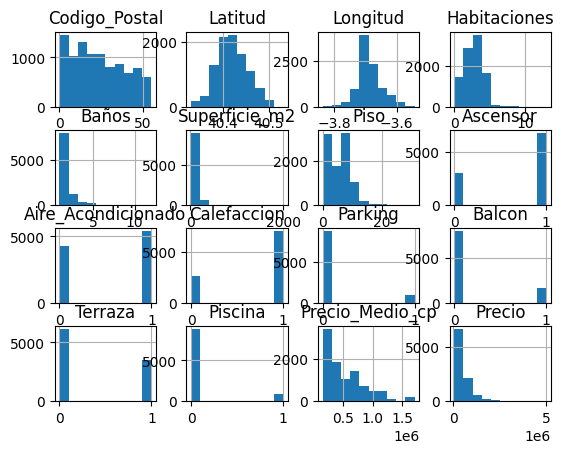

In [43]:
madrid.hist();

Según el test Normal la variable no parece tener una distribución normal. p_valor = 0.0 < 0.05
Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= 738.2540530613915 > 0.787 para alpha de 5.0% 


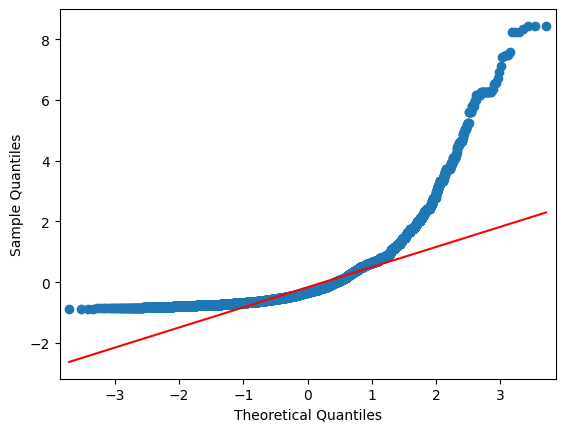

In [44]:
# Prueba de Normalidad de la Variable Precio

# H0: Distribución de la variable = Distribución Normal
# H1: Distribución de la variable != Distribución Normal

# Test Normal
# Si el p_valor es menor
nstatic,np_valor = normaltest(madrid["Precio"])
if np_valor < 0.05:
    print(f"Según el test Normal la variable no parece tener una distribución normal. p_valor = {np_valor} < {0.05}")
else:
    print(f"Según el test Normal la variable parece tener una distribucion normal. p_valor = {np_valor} > {0.05}")

# Test Anderson
# Si el valor del estadístico de prueba es mayor que el valor crítico para un nivel de significancia específico, se rechaza la hipótesis nula y se concluye que los datos no siguen una distribución normal.
#  Si el valor del estadístico de prueba es menor que el valor crítico para un nivel de significancia, no se rechaza la hipótesis nula y se puede asumir que los datos siguen una distribución normal.
astatic,ap_valor,alpha = anderson(madrid.Precio)[0],anderson(madrid.Precio)[1][2],anderson(madrid.Precio)[2][2]
if astatic > ap_valor:
    print(f"Según el test de Anderson-Darling la variable no parece tener una distribución normal. Estadistico= {astatic} > {ap_valor} para alpha de {alpha}% ")
else:
    print(f"Según el test de Anderson-Darling la variable parece tener una distribucion normal. Estadistico= {astatic} < {ap_valor} para alpha de {alpha}% ")

# Realizamos el grafico qqplot.
sm.qqplot(madrid["Precio"],fit=True,line='q'); # Los valores se alejan de la linea roja por lo que los datos de la variable no sigue una distribucion Normal

Skew is: 3.162152013330359


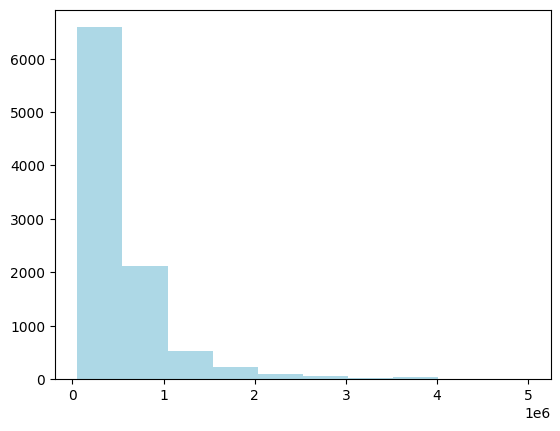

In [45]:
# Mostramos su distribución y su simestría
print ("Skew is:", madrid.Precio.skew())
plt.hist(madrid.Precio, color='lightblue')
plt.show()
# Sesgo positivo - La gran mayoria de los datos se acumulan en el primer intervalo

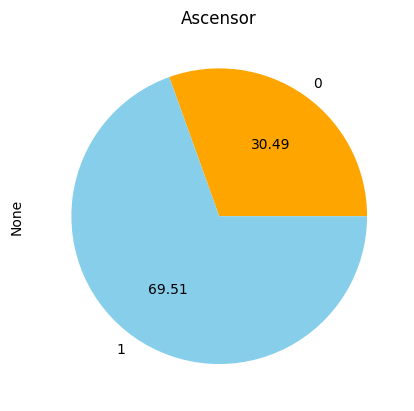

In [46]:
# Porcentaje de viviendas con acensor
madrid.groupby('Ascensor').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Ascensor");

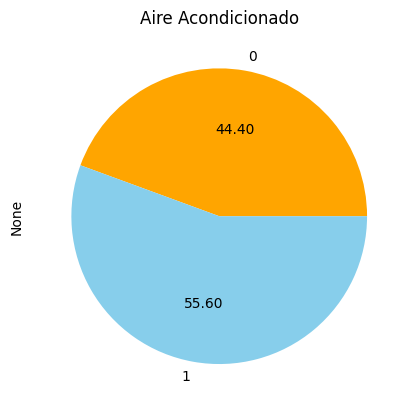

In [47]:
# Porcentaje de viviendas con Aire Acondicionado
madrid.groupby('Aire_Acondicionado').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Aire Acondicionado",);

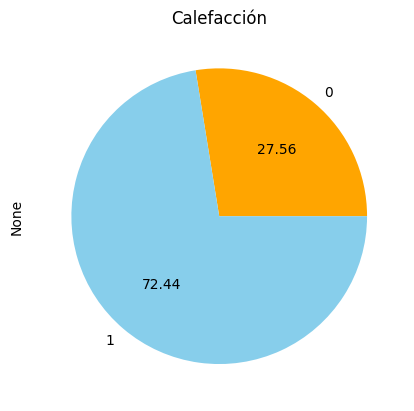

In [48]:
# Porcentaje de viviendas con calefacción
madrid.groupby('Calefaccion').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Calefacción",);

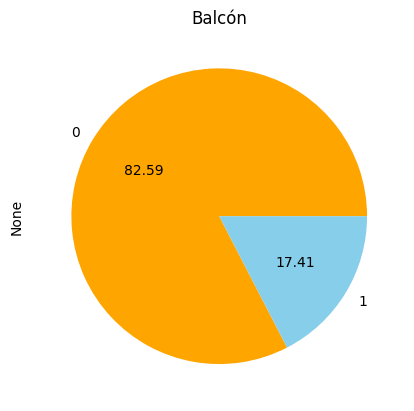

In [49]:
# Porcentaje de viviendas con balcón
madrid.groupby('Balcon').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Balcón",);

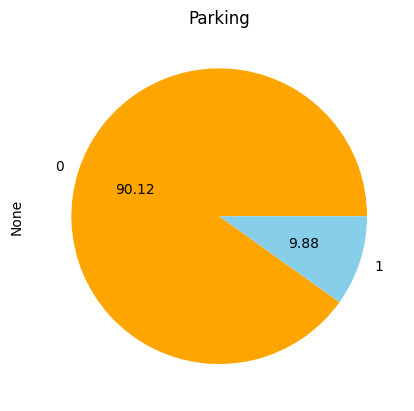

In [50]:
# Porcentaje de viviendas con parking
madrid.groupby('Parking').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Parking",);

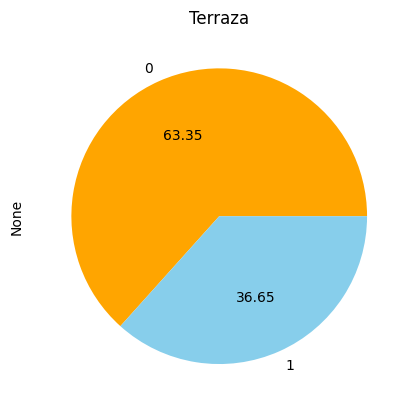

In [51]:
# Porcentaje de viviendas con Terrazas
madrid.groupby('Terraza').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Terraza",);

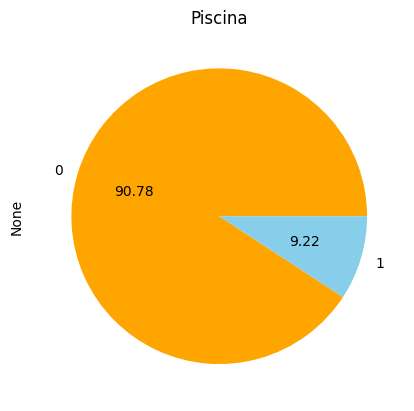

In [52]:
# Porcentaje de vivienda con Piscina
madrid.groupby('Piscina').size().plot(kind='pie', autopct='%.2f', colors=['orange', 'skyblue'], title="Piscina",);

### Análisis multivariable

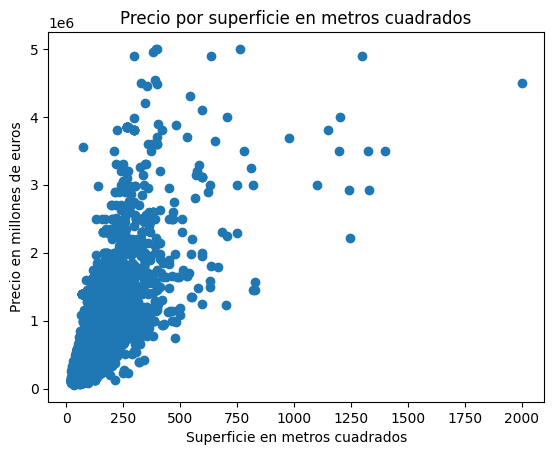

In [53]:
# Vemos la relación de los precios con respecto a la superficie
plt.scatter(madrid.Superficie_m2,madrid.Precio)
plt.xlabel('Superficie en metros cuadrados')
plt.ylabel('Precio en millones de euros')
plt.title('Precio por superficie en metros cuadrados');

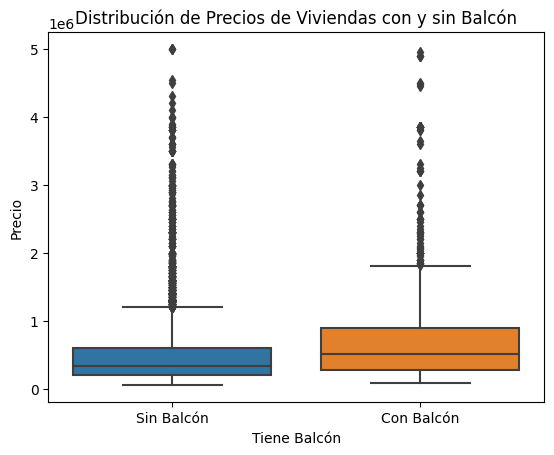

In [54]:
# Gráfico para ver como varían los precios de las propiedades que tienen o no tienen balcon
sns.boxplot(x='Balcon', y='Precio', data=madrid)
plt.xlabel('Tiene Balcón')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Viviendas con y sin Balcón')
plt.xticks([0, 1], ['Sin Balcón', 'Con Balcón'])
plt.show()

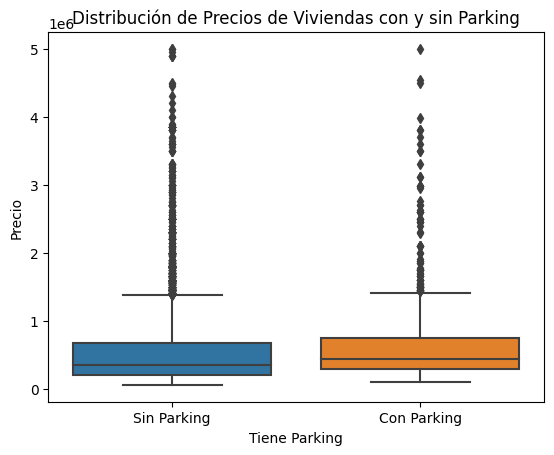

In [55]:
# Gráfico para ver como varían los precios de las propiedades que tienen o no tienen Parking
sns.boxplot(x='Parking', y='Precio', data=madrid)
plt.xlabel('Tiene Parking')
plt.ylabel('Precio')
plt.title('Distribución de Precios de Viviendas con y sin Parking')
plt.xticks([0, 1], ['Sin Parking', 'Con Parking'])
plt.show()

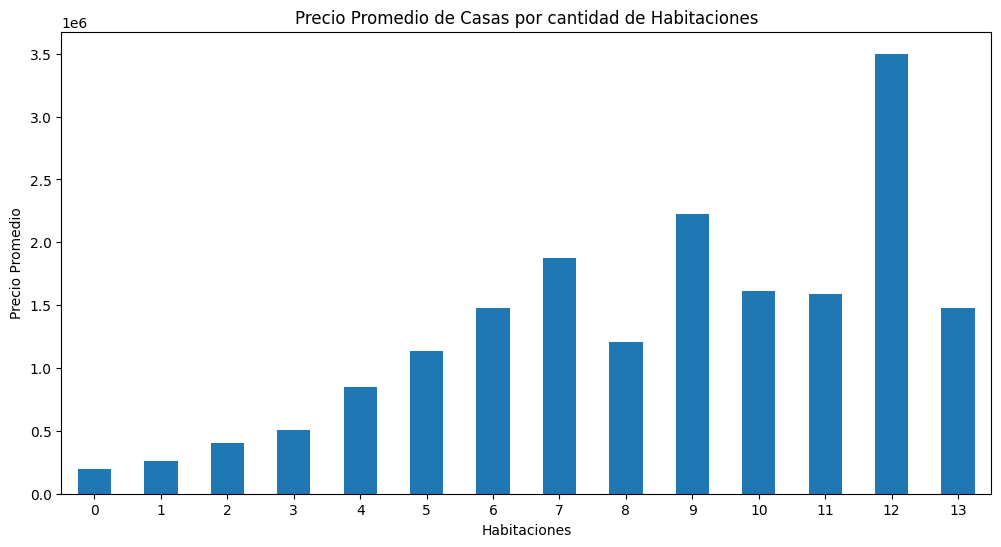

In [56]:
# Calculamos los precios medio de las casas segun la cantidad de habitaciones
precio_promedio_habitaciones = madrid.groupby('Habitaciones')['Precio'].mean()

# Hacemos un grafico de barras
plt.figure(figsize=(12, 6))
precio_promedio_habitaciones.plot(kind='bar')
plt.xlabel('Habitaciones')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de Casas por cantidad de Habitaciones')
plt.xticks(rotation=0)
plt.show()

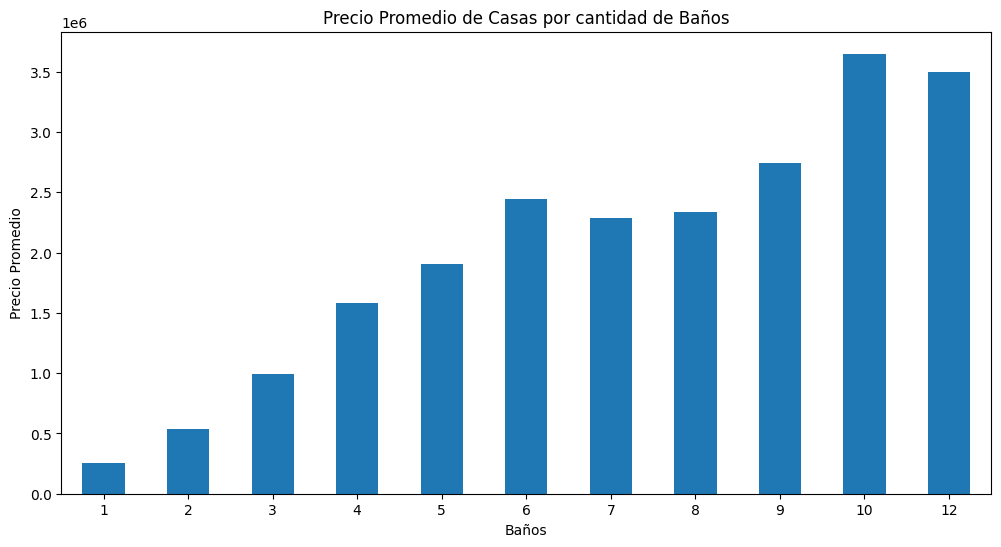

In [57]:
# Calculamos los precios medio de las casas segun la cantidad de habitaciones
Precio_medio_banyos = madrid.groupby('Baños')['Precio'].mean()

# Hacemos un grafico de barras
plt.figure(figsize=(12, 6))
Precio_medio_banyos.plot(kind='bar')
plt.xlabel('Baños')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de Casas por cantidad de Baños')
plt.xticks(rotation=0)
plt.show()

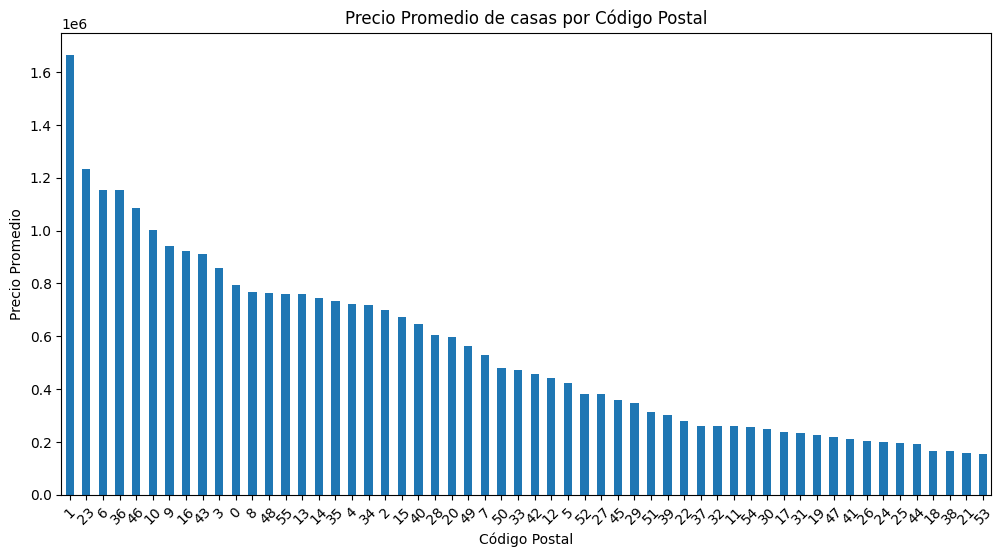

In [58]:
# Calculamos cuáles son los codigos postales más caros
precio_promedio_por_codigo_postal = madrid.groupby('Codigo_Postal')['Precio'].mean().sort_values(ascending=False)

# Hacemos un grafico de barras
plt.figure(figsize=(12, 6))
precio_promedio_por_codigo_postal.plot(kind='bar')
plt.xlabel('Código Postal')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio de casas por Código Postal')
plt.xticks(rotation=45)
plt.show()

## 6. Conclusiones.

Con los datos vistos hasta el momento, y reiterandonos en el siguiente gráfico, podemos observar las variables que más influyen en el precio.

<AxesSubplot:>

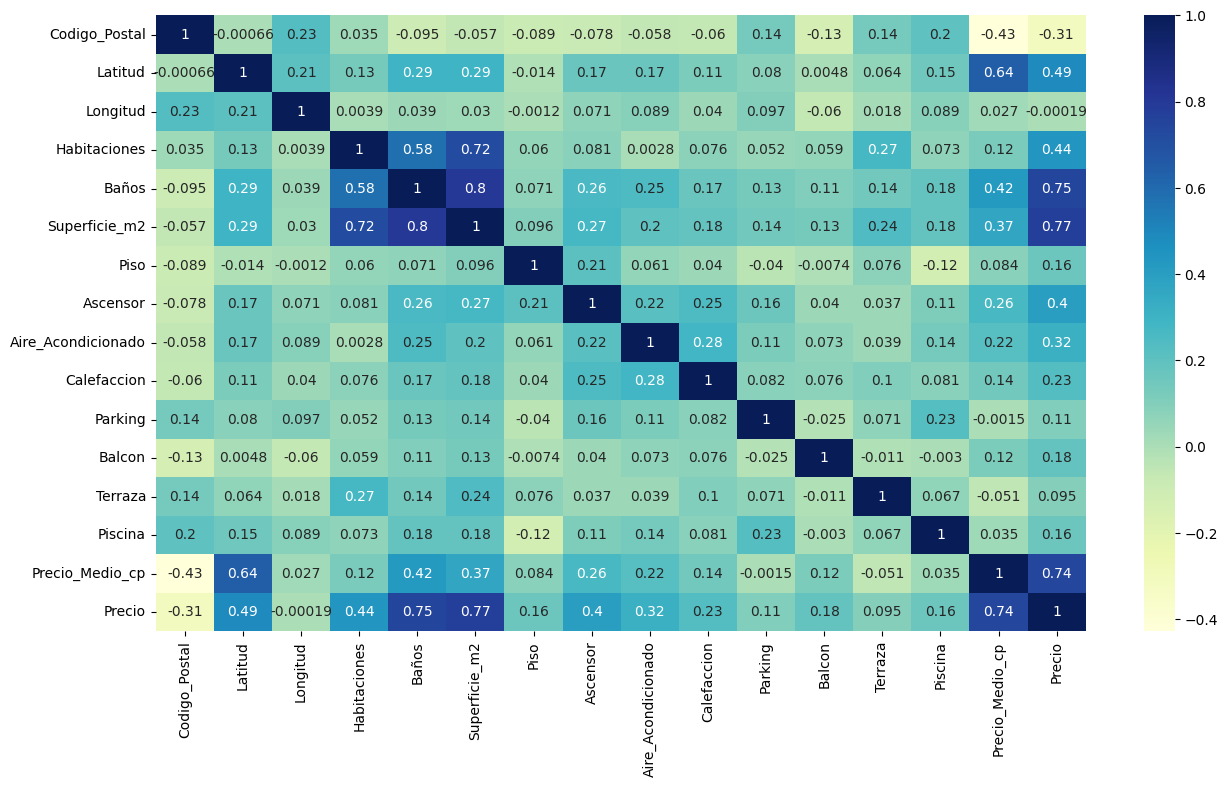

In [59]:
# Creamos un mapa de calor para ver la correlación
plt.figure(figsize=(15,8))
sns.heatmap(madrid.corr(method='spearman'),annot=True,cmap="YlGnBu")

In [60]:
# Utilizamos la correlación de spearman porque las variables no siguen una distribución normal
correlacion= madrid.corr(method='spearman')
print("Correlación Spearman:\n", correlacion['Precio'])

Correlación Spearman:
 Codigo_Postal        -0.307985
Latitud               0.488509
Longitud             -0.000185
Habitaciones          0.441141
Baños                 0.746738
Superficie_m2         0.773335
Piso                  0.158238
Ascensor              0.399028
Aire_Acondicionado    0.316816
Calefaccion           0.231332
Parking               0.106026
Balcon                0.182708
Terraza               0.094742
Piscina               0.159311
Precio_Medio_cp       0.738680
Precio                1.000000
Name: Precio, dtype: float64


### Evaluación de la correlación con la variable objetivo 

- **Superficie_m2** -> Tamaño de la casa está fuertemente relacionado con su precio
- **Baños** -> Las casas con más baños suelen ser más caras. Es una caracteristica relevante
- **Latitud** -> Si dividimos a Madrid de Norte a Sur, podemos ver como los barrios más caros se encuentran en el Norte
- **Precio_Medio_cp** -> Representa el precio medio por código postal y tiene una fuerte correlación con el precio. <br> Sin embargo, tendremos cuidado al incluir esta característica ya que puede generar un problema de <br> "data leakage", es decir, podrías estar incluyendo una característica que ya tiene la información que estás tratando de predecir. Probaremos modelos con y sin esta caracterisitca.
- **Habitaciones** -> Muestra una correlación relativamente alta
- **Ascensor, Aire_Acondicionado, Calefaccion, Parking, Balcon, Piscina, Terraza** -> Correlacion entre 0.1 y 0.4. Probaremos modelos con y sin estas variables. 
- **Longitud** -> Correlación muy baja, no la tendremos en cuenta
- **Codigo_Postal** -> Es una caracteristica categórica, no lo tendremos en cuenta pero si la guardaremos en un diccionario para relacionarlo con la zona más adelante

# 7. Creación CSV

In [61]:
madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Codigo_Postal,9666.0,23.507449,15.181591,0.000000,10.000000,21.000000,36.000000,5.500000e+01
Latitud,9666.0,40.422016,0.033236,40.331640,40.398871,40.422475,40.442376,4.053152e+01
Longitud,9666.0,-3.686314,0.040386,-3.836437,-3.709086,-3.694411,-3.666444,-3.542840e+00
Habitaciones,9666.0,2.665115,1.183477,0.000000,2.000000,3.000000,3.000000,1.300000e+01
Baños,9666.0,1.807987,1.020819,1.000000,1.000000,2.000000,2.000000,1.200000e+01
Superficie_m2,9666.0,110.929030,85.219614,20.000000,66.000000,91.000000,127.000000,2.000000e+03
Piso,9666.0,5.594558,4.063695,0.000000,0.000000,6.000000,8.000000,3.100000e+01
Ascensor,9666.0,0.695117,0.460382,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Aire_Acondicionado,9666.0,0.555969,0.496883,0.000000,0.000000,1.000000,1.000000,1.000000e+00
Calefaccion,9666.0,0.724395,0.446842,0.000000,0.000000,1.000000,1.000000,1.000000e+00


In [62]:
madrid.head()

,Codigo_Postal,Latitud,Longitud,Habitaciones,Baños,Superficie_m2,Piso,Ascensor,Aire_Acondicionado,Calefaccion,Parking,Balcon,Terraza,Piscina,Precio_Medio_cp,Precio
0,7,40.402584,-3.672911,2,2,102,0,1,1,1,0,0,0,1,529747,445000
1,37,40.423885,-3.621543,3,1,53,6,0,0,0,0,0,0,0,260568,108000
2,37,40.423680,-3.621510,3,1,53,0,0,0,0,0,0,0,0,260568,108000
3,12,40.407387,-3.701162,2,1,68,0,0,1,1,0,0,0,0,440796,235000
4,1,40.420685,-3.688424,2,2,177,7,1,1,0,0,1,0,0,1709528,2350000


In [63]:
# Funcion para guardar CSV 
def csv(nombre_archivo, archivo_guardar):
    ruta_archivo = '../Data/Processed/' + nombre_archivo + '.csv'
    archivo_guardar.to_csv(ruta_archivo, index=False)

In [64]:
# Creamos un csv con los datos para el mapa
# csv("mapa", madrid)

In [66]:
# Eliminamos las columnas Codigo_Postal y Longitud
madrid.drop(columns=['Codigo_Postal','Longitud','Piso'],inplace=True)

In [67]:
madrid.shape

(9666, 13)

In [68]:
# Guardamos el CSV Madrid para crear, entrenar y validar los modelos
csv("madrid", madrid)